# GoogLeNet(Inception v3)

### 노드 간의 연결을 줄이면서, 행렬 연산은 Dense연산을 하도록 처리하는가

In [1]:
from tensorflow import keras
from keras.applications.inception_v3 import InceptionV3, decode_predictions

inceptionv3 = InceptionV3(input_shape = (299,299,3))

96116736/96112376 [==============================] - 12s 0us/step


In [6]:
inceptionv3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
_______________________________________________________________________________________

In [8]:
import numpy as np
import cv2
import time

img = cv2.imread('images/bird1.jpg', -1)
img = cv2.resize(img, (299,299))

start = time.time()
yhat = inceptionv3.predict(img.reshape(-1, 299,299, 3))
time = time.time() - start
label = decode_predictions(yhat)
label = label[0][0]

테스트 시 소요 시간 : 0.08954262733459473
clog (99.26%)


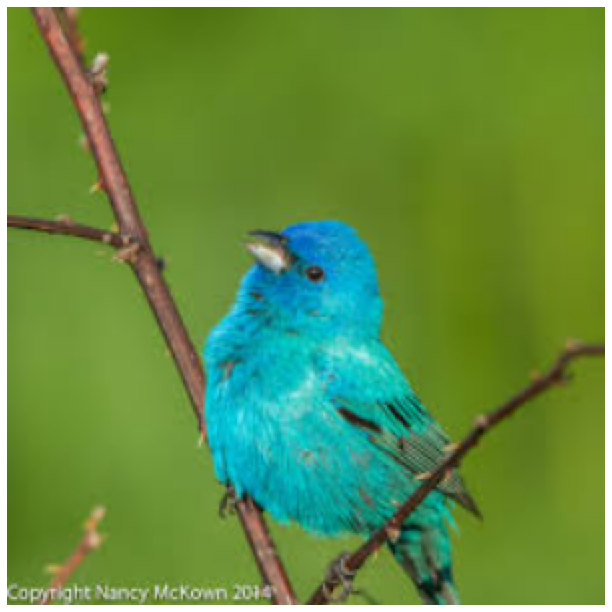

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

print('테스트 시 소요 시간 : {}'.format(time))
print('%s (%.2f%%)' %(label[1], label[2]*100))

img = img[:,:,::-1]
plt.figure(figsize=(11,11))
plt.imshow(img)
plt.axis('off')
plt.show()